In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
#load airline safety dataset
airsafe_df = pd.read_csv('airline-safety.csv')

#check NA
print(airsafe_df.isna().sum()) #no missing values

#preview data
airsafe_df.head()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


[[1.40714286e+01 4.14285714e+00 2.33214286e+02 5.50000000e+00
  9.28571429e-01 2.82142857e+01]
 [1.00000000e+01 2.50000000e+00 5.35000000e+01 7.00000000e+00
  2.25000000e+00 3.93250000e+02]
 [3.39393939e+00 8.78787879e-01 1.81818182e+01 2.87878788e+00
  3.33333333e-01 2.14242424e+01]
 [1.06000000e+01 5.00000000e+00 4.43200000e+02 6.20000000e+00
  8.00000000e-01 8.68000000e+01]]
KMeans [2 0 2 2 2 1 3 2 2 2 2 1 2 0 2 2 3 2 2 3 0 2 0 2 0 2 2 0 3 1 2 3 2 2 1 0 2
 2 2 2 0 2 0 2 2 0 2 2 2 0 2 0 0 0 2 2]


TypeError: scatter() got multiple values for argument 'c'

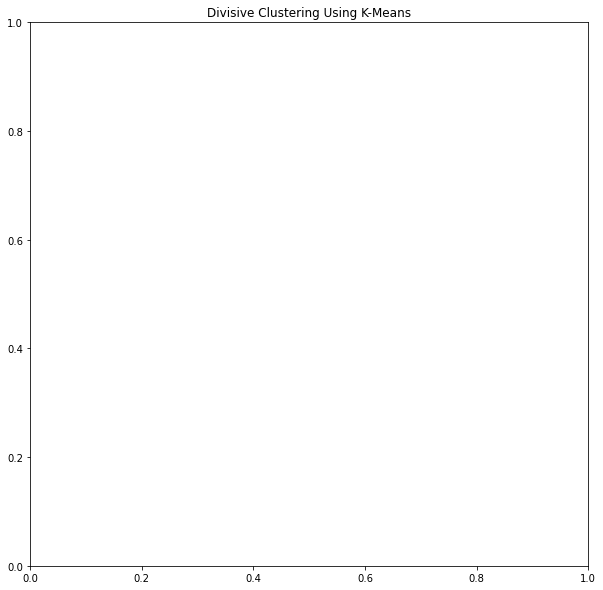

In [9]:
#independent variables: omit col 0 and 1
#will use 4 classes

#isolate and scale attributes
X = airsafe_df.drop(['airline', 'avail_seat_km_per_week'], axis = 1)
#scale data
scaler = StandardScaler()
scaler.fit_transform(X)

#K-Means
kmeans = KMeans(n_clusters = 4)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
#print values for each of the 4 centroids
print(centroids)
print('KMeans', y_means)

#visualization
plt.figure(figsize = (10,10))
plt.title('Divisive Clustering Using K-Means')
#visualizing # fatalities in 1985-1999 and # fatalities 2000-2014
plt.scatter(X['fatalities_85_99'], X['fatalities_00_14'], c = y_means, cmap = 'rainbow')
plt.scatter(centroids[:,0], centroids[:,2], c = 'black', s = 100)
plt.show()


Agglomerative clustering [1 0 1 1 1 2 0 1 1 1 1 2 1 0 1 1 3 1 1 3 0 1 0 1 0 1 1 0 3 2 1 3 1 1 2 0 1
 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1]


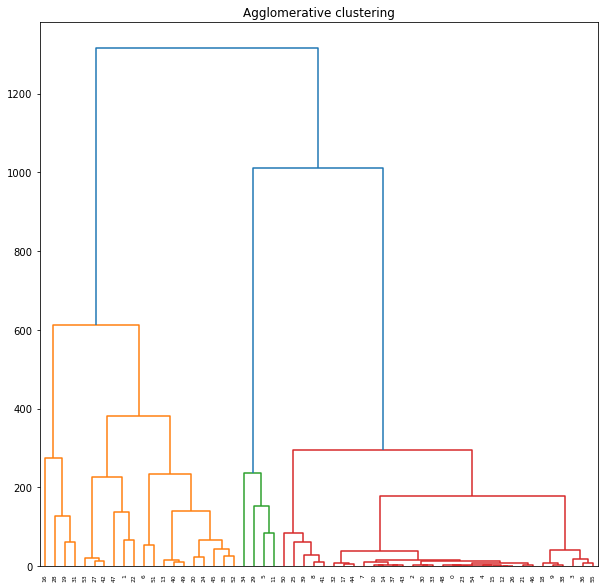

In [85]:
#agglomerative
plt.figure(figsize = (10, 10))
plt.title('Agglomerative clustering')
#Ward
Dendrogram = sch.dendrogram((sch.linkage(X, method = 'ward')))

#specify 4 clusters
ac = AgglomerativeClustering(n_clusters = 4)
y_ac = ac.fit_predict(X)

print('Agglomerative clustering', y_ac)